Q1:

In [3]:
# Import standard packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

# Import additional packages
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import f

alpha = 0.05
a = 3
n = 12
x = pd.read_csv("Project1.csv")
data = x.values[:,1:3]
# print(data)

# Sort them into groups, according to column 1("Power")
group1 = data[data[:,0] == 1,1]
group2 = data[data[:,0] == 2,1]
group3 = data[data[:,0] == 3,1]

# Do the one-way ANOVA
df = pd.DataFrame(data, columns = ['chocolate', 'capacity'])   
model = ols('capacity ~ C(chocolate)', df).fit()
anovaResults = round(anova_lm(model), 2)
print('The ANOVA table: \n', anovaResults)  

F0, pVal1 = stats.f_oneway(group1, group2, group3)
# 法1：
if pVal1 < alpha:
    print('\nSince p-value < 0.05, reject H0.')
else:
    print('\nAccept H0.') 
    
# 法2：
F = round(f.ppf(0.95,dfn = 2,dfd = 33), 2)
if F0 > F:
    print('Since F0 > F(0.05,2,33) = ', F, ', reject H0.')
else:
    print('Accept H0.') 

The ANOVA table: 
                 df   sum_sq  mean_sq      F  PR(>F)
C(chocolate)   2.0  1952.64   976.32  93.58     0.0
Residual      33.0   344.31    10.43    NaN     NaN

Since p-value < 0.05, reject H0.
Since F0 > F(0.05,2,33) =  3.28 , reject H0.


Q2:

Text(0, 0.5, 'Residuals')

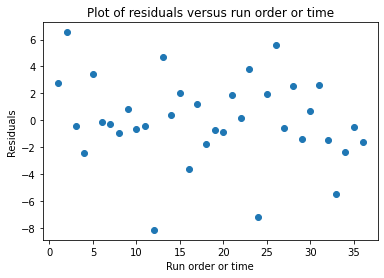

In [15]:
# 计算蚀刻率的残差
data_res = data.astype(float)
list_power = [1, 2, 3]
for k in list_power:
    cnt = data_res[data_res[:,0] == k,1]
    data_res[data_res[:,0] == k,1] = cnt - np.mean(cnt)
# print(data_res)

# 画出残差时序图，检测残差之间是否具有独立性
order = data_res[:,1]
x_order = np.linspace(1,36,36)
plt.scatter(x_order, order)
plt.title('Plot of residuals versus run order or time')
plt.xlabel('Run order or time')
plt.ylabel('Residuals')

In [16]:
# 用Durbin-Watson检验进行独立性检验
def durbin_watson(residuals):
    nume = sum(np.diff(residuals.T) ** 2)
    deno = sum(residuals ** 2)
    return nume / deno
res = data_res[:,1]
dw = durbin_watson(res)
print('Durbin-Watson检验的统计量为：', round(dw,2))

Durbin-Watson检验的统计量为： 2.3


In [18]:
# 用Bartlett检验进行方差齐性检验
bart, pVal3 = stats.bartlett(group1, group2, group3)
bart_stat = stats.chi2.isf(alpha, a-1)

# 法1：
print('Bartlett检验的P值为：', round(pVal3, 2))
if pVal3 < alpha:
    print('Since p-value < 0.05, reject H0.')
else:
    print('Accept H0')  

# 法2：
print('Bartlett检验统计量：', round(bart, 2))
print('𝜒_(𝛼,𝑎−1)^2: ', round(bart_stat, 2))
if bart > bart_stat:
    print('Since 𝜒_0^2 > 𝜒_(𝛼,𝑎−1)^2, reject H0.')
else:
    print('Accept H0')  

Bartlett检验的P值为： 0.81
Accept H0
Bartlett检验统计量： 0.42
𝜒_(𝛼,𝑎−1)^2:  5.99
Accept H0


In [21]:
# 用Levene检验进行方差齐性检验
lene, pVal4 = stats.levene(group1, group2, group3)
print('Levene检验的P值为：', round(pVal4, 2))
if pVal4 < alpha:
    print('Since p-value < 0.05, reject H0.')
else:
    print('Accept H0')  
   

Levene检验的P值为： 0.98
Accept H0


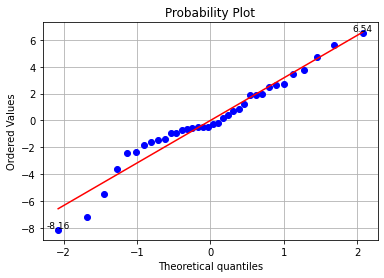

[-8.15833333 -7.2        -5.48333333 -3.6        -2.45833333 -2.38333333
 -1.8        -1.58333333 -1.48333333 -1.38333333 -0.95833333 -0.9
 -0.7        -0.65833333 -0.58333333 -0.48333333 -0.45833333 -0.45833333
 -0.25833333 -0.15833333  0.2         0.4         0.71666667  0.84166667
  1.2         1.9         1.91666667  2.          2.51666667  2.61666667
  2.74166667  3.44166667  3.8         4.7         5.61666667  6.54166667]


In [22]:
# 用qq图进行正态性检验
osm, osr = stats.probplot(res, dist = 'norm', plot = plt)
x1 = osm[0][0]
y1 = osm[1][0]
plt.text(x1, y1, '%.2f' % float(y1), ha = 'center', va = 'bottom',fontsize = 9)
x2 = osm[0][-1]
y2 = osm[1][-1]
plt.text(x2, y2, '%.2f' % float(y2), ha = 'center', va = 'bottom',fontsize = 9)
plt.grid()
plt.show()

print(osm[1])

In [26]:
# 用Shapiro-Wilk检验进行正态性检验
SW, pVal2= stats.shapiro(res)
print(round(SW, 2))
print(round(pVal2, 2))

if pVal2 > alpha:
    print('\nAccept the null hypothesis.')
else:
    print('\nSince p-value > 0.05, reject the null null hypothesis') 

0.96
0.26

Accept the null hypothesis.


In [30]:
# Estimation of Parameter(𝜎2 and 𝜇𝑖 )
mu_1 = np.mean(group1)
mu_2 = np.mean(group2)
mu_3 = np.mean(group3)

mu = [mu_1, mu_2, mu_3]

sse = 0
for i in range(a):
    se = 0
    chocolate_list = data[data[:,0] == i + 1,1]
    for j in range(n):
        se += (chocolate_list[j] - mu[i]) ** 2
    sse += se
var = round(sse / (a * (n - 1)),2) 
print('Estimate of the population mean：{0}'.format(np.round(mu, 2)))
print('An estimate of the population variance：{0}'.format(var))


Estimate of the population mean：[116.06 100.7  100.18]
An estimate of the population variance：10.43


In [28]:
#LSD(least significant difference)最小显著差异
def LSD():   
    df = a * (n-1)
    t_value = stats.t(df).isf(alpha / 2)    
    mse = var
    lsd = t_value * math.sqrt(2.0 * mse / n)
    # print(lsd)
    return lsd

for i in range(a):
    for j in range(i + 1,a):
        dist = round(abs(mu[i] - mu[j]), 1)
        print('The difference between group', i + 1, 'and group', j + 1, ': ', dist)
print('Value of LSD: ', round(LSD(),2))
        
cmp = 0
for s in range(a):
    for t in range(i + 1, a):
        lsd = LSD()
        dist = round(abs(mu[s] - mu[t]), 1)
        if(dist < lsd):
            print('No difference between group', s + 1, 'and group', t + 1, ': ')
            cmp += 1
if(cmp == 0):
    print('Reject H0, and there is significant difference in the mean value of any two treatments')

The difference between group 1 and group 2 :  15.4
The difference between group 1 and group 3 :  15.9
The difference between group 2 and group 3 :  0.5
Value of LSD:  2.68
Reject H0, and there is significant difference in the mean value of any two treatments
